# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

## [Adult dataset](https://archive.ics.uci.edu/ml/datasets/adult)

This data file does not have a header with column names. Look at the ".names" text file in the Data Folder and use the same procedure used for Iris

Print also the types of the columns using the `types` attribute

In [25]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation'
         ,'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'high-income']

url = https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Load the data in the dataframe `df` and then show the column types with the `.dtypes` attribute of a Pandas DataFrame

In [7]:

names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation' ,'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'high-income']
df=pd.read_csv(r'C:\\Users\\DataScienceLab\\Downloads\\Lab material-20191211 (1)\\dm-02-data-lab\\dm-02-data-lab\\adults\\adult.data',header=None,names=names)
df.info('names')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
high-income       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Show the head and then generate the histograms for all the columns

In [10]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF94FB89E8>,
      dtype=object)

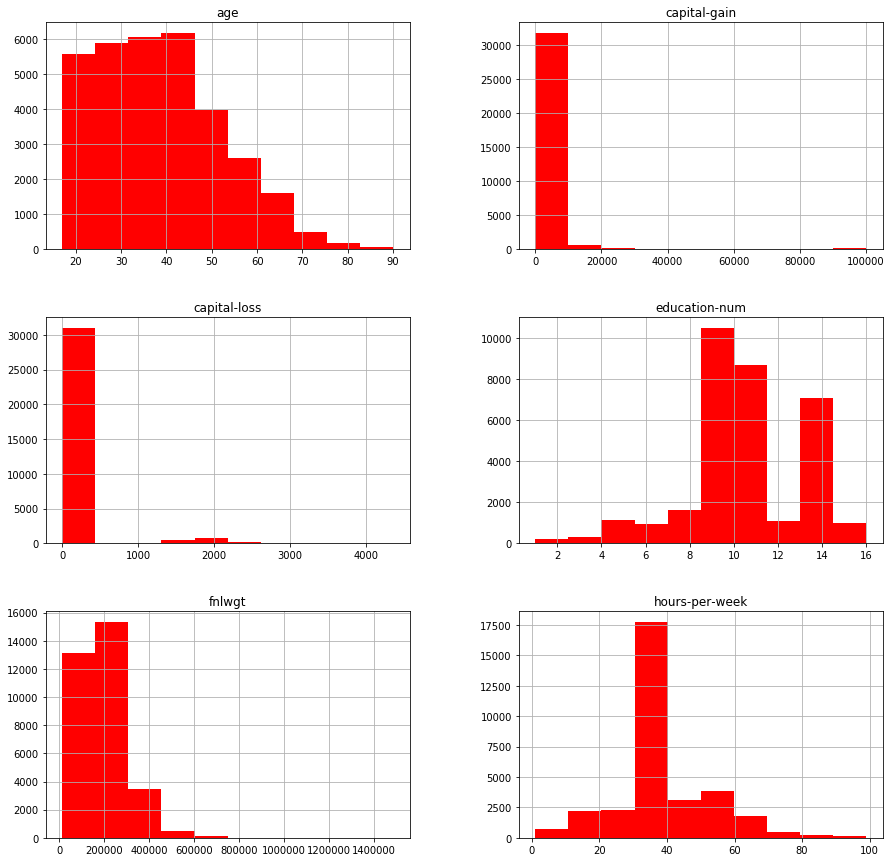

In [12]:
pd.DataFrame.hist(df,figsize=(15,15),color='red')

Show a bar graph with the value counts of the attribute `high-income`.
Use the method `value_counts` of Pandas, then `plot` with the option `kind = 'bar'`

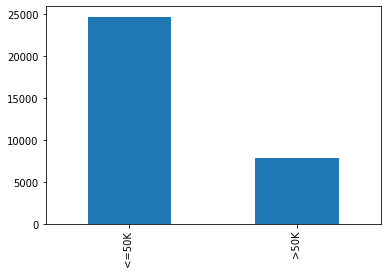

In [13]:
df['high-income'].value_counts().plot('bar')

### More examples of figures
Boxplot

[More on boxplots](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

Use the [`boxplot` method](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of Seaborn with `hours-per-week` in the `x` axis and `high-income` in the `y` axis. The columns are extracted with the `loc` method of Pandas DataFrames, with index expression `[:,'attribute-name']` (means all the elements of column `attribute-name`)



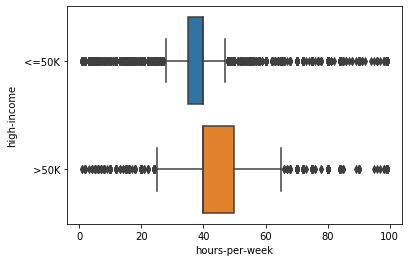

In [17]:
import seaborn as sns
sns.boxplot(y=df['high-income'],x=df['hours-per-week']);


Similar boxplot for `'capital-loss'` and `'high-income']`

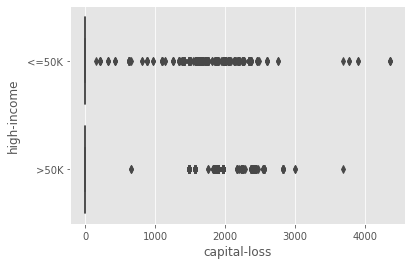

In [49]:
sns.boxplot(y=df['high-income'],x=df['capital-loss']);

Something is wrong, the figure does not look like a proper boxplot.

Let's look at the **capital-loss** column with the `describe` method

In [23]:
df['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

The three quartiles are all zero, and there are no left outliers.

Let's try with a logarithmic transformation (add +1 to deal with the zero values)
- use the `log10` function of `numpy` to transform the `capital-loss`+1
- prepare a plot figure of size [10,10]
- boxplot with Seaborn

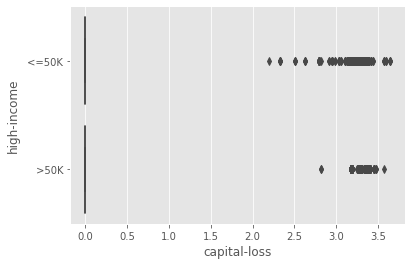

In [62]:
l=np.log10(df['capital-loss']+1)
sns.boxplot(y=df['high-income'],x=l)

You can observe that a most of the data are 'compressed' at 0
- it is due to the zero values to which we added 1, whose log is 0 again

Look at the rows with non-zero values: in the x values, instead of the `:` indicating 'all the rows' we must use a 'selector expression', in this case `df['capital-loss']!=0`

<Figure size 2160x2160 with 0 Axes>

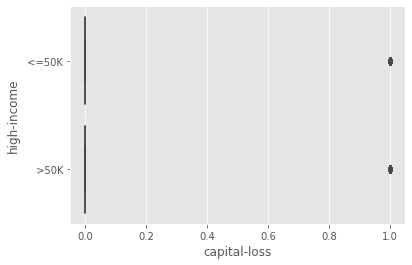

<Figure size 2160x2160 with 0 Axes>

In [68]:
l=np.log10(df['capital-loss']+1)
sns.boxplot(y=df['high-income'],x=(l!=0))


Now we see that the non-zero values have some structure

### Plot another pair of columns
`education-num` and `high-income`

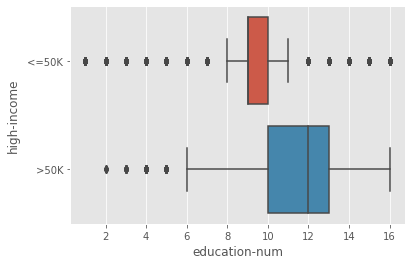

In [69]:
sns.boxplot(y=df['high-income'],x=df['education-num'])